In [1]:
import pandas as pd
import numpy as np
import sqlalchemy
import os
import calendar
from test import connection
import matplotlib.pyplot as plt
import scipy.stats

In [47]:
df = pd.read_csv('Data/storms_updated2.csv')

In [48]:
df.tail(20)

,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
17766,Wanda,2021,11,2,12,35.5,-40.7,tropical storm,0,40,996,80.0,0.0
17767,Wanda,2021,11,2,18,36.2,-40.5,tropical storm,0,40,996,90.0,0.0
17768,Wanda,2021,11,3,0,36.9,-40.4,tropical storm,0,40,996,110.0,0.0
17769,Wanda,2021,11,3,6,37.6,-40.2,tropical storm,0,40,995,110.0,0.0
17770,Wanda,2021,11,3,12,38.4,-39.9,tropical storm,0,40,994,120.0,0.0
17771,Wanda,2021,11,3,18,39.3,-39.7,tropical storm,0,45,992,130.0,0.0
17772,Wanda,2021,11,4,0,40.2,-39.7,tropical storm,0,45,992,150.0,0.0
17773,Wanda,2021,11,4,6,41.0,-39.7,tropical storm,0,45,992,140.0,0.0
17774,Wanda,2021,11,4,12,41.7,-39.7,tropical storm,0,40,994,120.0,0.0
17775,Wanda,2021,11,4,18,42.1,-39.6,tropical storm,0,40,994,120.0,0.0


In [21]:
better_df = pd.read_csv('Data/hurricane_clean_dataset.csv')

In [22]:
better_df

,Name,Areas affected,Month,Day,Year,Wind Speed (mph),Pressure (hPa),Damages ($),Deaths
0,San Felipe,"Lesser Antilles, The Bahamas,United States Eas...",September,13,1928,160,929,100000000.0,4000
1,Camaguey,"Lesser Antilles, Jamaica, Cayman Islands, Cuba...",November,5,1932,175,915,40000000.0,3103
2,New England,"Eastern United States, Southwestern Quebec",September,19,1938,160,940,306000000.0,682
3,Janet,"Lesser Antilles, Central America",September,27,1955,175,914,65800000.0,1023
4,Inez,"Greater Antilles, Florida, Mexico",September,28,1966,165,927,229000000.0,756
...,...,...,...,...,...,...,...,...,...
97,Humberto,"Texas, Louisiana, Mississippi, The Carolinas",September,12,2007,90,985,50000000.0,1
98,Lorenzo,Central Mexico,September,25,2007,80,990,92000000.0,6
99,Noel,"The Caribbean, The Bahamas, Florida, Eastern U...",October,28,2007,80,980,580000000.0,222
100,Hanna,"Puerto Rico, Turks and Caicos Islands, The Bah...",August,28,2008,85,977,160000000.0,537


In [23]:
df2 = df[['name', 'month', 'day', 'year', 'lat', 'long', 'category']]

In [24]:
df2

,name,month,day,year,lat,long,category
0,AL011852,8,26,1852,30.2,-88.6,3
1,AL031853,9,3,1853,19.7,-56.2,4
2,AL031854,9,7,1854,28.0,-78.6,3
3,AL031854,9,8,1854,31.6,-81.1,3
4,AL031854,9,8,1854,31.7,-81.1,3
...,...,...,...,...,...,...,...
17781,Wanda,11,6,2021,37.6,-38.3,0
17782,Wanda,11,6,2021,37.2,-38.4,0
17783,Wanda,11,6,2021,37.1,-38.0,0
17784,Wanda,11,7,2021,37.4,-37.4,0


In [25]:
df2.dropna()
df2

,name,month,day,year,lat,long,category
0,AL011852,8,26,1852,30.2,-88.6,3
1,AL031853,9,3,1853,19.7,-56.2,4
2,AL031854,9,7,1854,28.0,-78.6,3
3,AL031854,9,8,1854,31.6,-81.1,3
4,AL031854,9,8,1854,31.7,-81.1,3
...,...,...,...,...,...,...,...
17781,Wanda,11,6,2021,37.6,-38.3,0
17782,Wanda,11,6,2021,37.2,-38.4,0
17783,Wanda,11,6,2021,37.1,-38.0,0
17784,Wanda,11,7,2021,37.4,-37.4,0


In [26]:
df2 = df2.rename(columns={'name': 'Name', 'month': 'Month', 'day':'Day', 'year':'Year'})
df2

,Name,Month,Day,Year,lat,long,category
0,AL011852,8,26,1852,30.2,-88.6,3
1,AL031853,9,3,1853,19.7,-56.2,4
2,AL031854,9,7,1854,28.0,-78.6,3
3,AL031854,9,8,1854,31.6,-81.1,3
4,AL031854,9,8,1854,31.7,-81.1,3
...,...,...,...,...,...,...,...
17781,Wanda,11,6,2021,37.6,-38.3,0
17782,Wanda,11,6,2021,37.2,-38.4,0
17783,Wanda,11,6,2021,37.1,-38.0,0
17784,Wanda,11,7,2021,37.4,-37.4,0


In [15]:
df2.dtypes

Name      object
Month      int64
Day        int64
Year       int64
lat      float64
long     float64
dtype: object

In [16]:
better_df.dtypes

Name                 object
Areas affected       object
Month                object
Day                   int64
Year                  int64
Wind Speed (mph)      int64
Pressure (hPa)       object
Damages ($)         float64
Deaths                int64
dtype: object

In [27]:
df2['Month'] = df2['Month'].apply(lambda x: calendar.month_name[x])

In [28]:
df2

,Name,Month,Day,Year,lat,long,category
0,AL011852,August,26,1852,30.2,-88.6,3
1,AL031853,September,3,1853,19.7,-56.2,4
2,AL031854,September,7,1854,28.0,-78.6,3
3,AL031854,September,8,1854,31.6,-81.1,3
4,AL031854,September,8,1854,31.7,-81.1,3
...,...,...,...,...,...,...,...
17781,Wanda,November,6,2021,37.6,-38.3,0
17782,Wanda,November,6,2021,37.2,-38.4,0
17783,Wanda,November,6,2021,37.1,-38.0,0
17784,Wanda,November,7,2021,37.4,-37.4,0


In [29]:
df3 = pd.merge(better_df, df2, how='left', on=['Name','Month','Day','Year'])

In [30]:
df3

,Name,Areas affected,Month,Day,Year,Wind Speed (mph),Pressure (hPa),Damages ($),Deaths,lat,long,category
0,San Felipe,"Lesser Antilles, The Bahamas,United States Eas...",September,13,1928,160,929,100000000.0,4000,NaN,NaN,NaN
1,Camaguey,"Lesser Antilles, Jamaica, Cayman Islands, Cuba...",November,5,1932,175,915,40000000.0,3103,NaN,NaN,NaN
2,New England,"Eastern United States, Southwestern Quebec",September,19,1938,160,940,306000000.0,682,NaN,NaN,NaN
3,Janet,"Lesser Antilles, Central America",September,27,1955,175,914,65800000.0,1023,17.3,-83.0,4.0
4,Inez,"Greater Antilles, Florida, Mexico",September,28,1966,165,927,229000000.0,756,16.3,-63.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,Hanna,"Puerto Rico, Turks and Caicos Islands, The Bah...",August,28,2008,85,977,160000000.0,537,20.5,-59.6,0.0
196,Kyle,"Puerto Rico, Hispaniola, Bermuda, New England,...",September,25,2008,85,984,57100000.0,8,21.5,-70.0,-1.0
197,Kyle,"Puerto Rico, Hispaniola, Bermuda, New England,...",September,25,2008,85,984,57100000.0,8,22.0,-69.4,0.0
198,Kyle,"Puerto Rico, Hispaniola, Bermuda, New England,...",September,25,2008,85,984,57100000.0,8,22.4,-68.7,0.0


In [31]:
df4 = df3.dropna()
df4

,Name,Areas affected,Month,Day,Year,Wind Speed (mph),Pressure (hPa),Damages ($),Deaths,lat,long,category
3,Janet,"Lesser Antilles, Central America",September,27,1955,175,914,6.580000e+07,1023,17.3,-83.0,4.0
4,Inez,"Greater Antilles, Florida, Mexico",September,28,1966,165,927,2.290000e+08,756,16.3,-63.0,3.0
5,Inez,"Greater Antilles, Florida, Mexico",September,28,1966,165,927,2.290000e+08,756,16.5,-64.4,4.0
6,Inez,"Greater Antilles, Florida, Mexico",September,28,1966,165,927,2.290000e+08,756,17.0,-67.2,5.0
7,Camille,"Cuba, United States Gulf Coast",August,16,1969,175,900,1.420000e+09,259,24.3,-86.6,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,Hanna,"Puerto Rico, Turks and Caicos Islands, The Bah...",August,28,2008,85,977,1.600000e+08,537,20.5,-59.6,0.0
196,Kyle,"Puerto Rico, Hispaniola, Bermuda, New England,...",September,25,2008,85,984,5.710000e+07,8,21.5,-70.0,-1.0
197,Kyle,"Puerto Rico, Hispaniola, Bermuda, New England,...",September,25,2008,85,984,5.710000e+07,8,22.0,-69.4,0.0
198,Kyle,"Puerto Rico, Hispaniola, Bermuda, New England,...",September,25,2008,85,984,5.710000e+07,8,22.4,-68.7,0.0


In [33]:
df4 = df4.reset_index(drop=True)
df4

,Name,Areas affected,Month,Day,Year,Wind Speed (mph),Pressure (hPa),Damages ($),Deaths,lat,long,category
0,Janet,"Lesser Antilles, Central America",September,27,1955,175,914,6.580000e+07,1023,17.3,-83.0,4.0
1,Inez,"Greater Antilles, Florida, Mexico",September,28,1966,165,927,2.290000e+08,756,16.3,-63.0,3.0
2,Inez,"Greater Antilles, Florida, Mexico",September,28,1966,165,927,2.290000e+08,756,16.5,-64.4,4.0
3,Inez,"Greater Antilles, Florida, Mexico",September,28,1966,165,927,2.290000e+08,756,17.0,-67.2,5.0
4,Camille,"Cuba, United States Gulf Coast",August,16,1969,175,900,1.420000e+09,259,24.3,-86.6,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
154,Hanna,"Puerto Rico, Turks and Caicos Islands, The Bah...",August,28,2008,85,977,1.600000e+08,537,20.5,-59.6,0.0
155,Kyle,"Puerto Rico, Hispaniola, Bermuda, New England,...",September,25,2008,85,984,5.710000e+07,8,21.5,-70.0,-1.0
156,Kyle,"Puerto Rico, Hispaniola, Bermuda, New England,...",September,25,2008,85,984,5.710000e+07,8,22.0,-69.4,0.0
157,Kyle,"Puerto Rico, Hispaniola, Bermuda, New England,...",September,25,2008,85,984,5.710000e+07,8,22.4,-68.7,0.0


In [24]:
better_df

,Name,Areas affected,Month,Day,Year,Wind Speed (mph),Pressure (hPa),Damages ($),Deaths
0,San Felipe,"Lesser Antilles, The Bahamas,United States Eas...",September,13,1928,160,929,100000000.0,4000
1,Camaguey,"Lesser Antilles, Jamaica, Cayman Islands, Cuba...",November,5,1932,175,915,40000000.0,3103
2,New England,"Eastern United States, Southwestern Quebec",September,19,1938,160,940,306000000.0,682
3,Janet,"Lesser Antilles, Central America",September,27,1955,175,914,65800000.0,1023
4,Inez,"Greater Antilles, Florida, Mexico",September,28,1966,165,927,229000000.0,756
...,...,...,...,...,...,...,...,...,...
97,Humberto,"Texas, Louisiana, Mississippi, The Carolinas",September,12,2007,90,985,50000000.0,1
98,Lorenzo,Central Mexico,September,25,2007,80,990,92000000.0,6
99,Noel,"The Caribbean, The Bahamas, Florida, Eastern U...",October,28,2007,80,980,580000000.0,222
100,Hanna,"Puerto Rico, Turks and Caicos Islands, The Bah...",August,28,2008,85,977,160000000.0,537


In [34]:
df4.to_csv('Data/attempted_merge.csv')

In [2]:
df = pd.read_csv('Data/attempted_merge.csv', index_col=[0])

In [38]:
df2 = df.groupby('Year')

In [39]:
df2.count()

,Name,Areas affected,Month,Day,Wind Speed (mph),Pressure (hPa),Damages ($),Deaths,lat,long,category
Year,,,,,,,,,,,
1955,1,1,1,1,1,1,1,1,1,1,1
1956,1,1,1,1,1,1,1,1,1,1,1
1961,1,1,1,1,1,1,1,1,1,1,1
1966,3,3,3,3,3,3,3,3,3,3,3
1967,2,2,2,2,2,2,2,2,2,2,2
1969,2,2,2,2,2,2,2,2,2,2,2
1971,2,2,2,2,2,2,2,2,2,2,2
1978,1,1,1,1,1,1,1,1,1,1,1
1979,6,6,6,6,6,6,6,6,6,6,6


In [3]:
df

,Name,Areas affected,Month,Day,Year,Wind Speed (mph),Pressure (hPa),Damages ($),Deaths,lat,long,category
0,Janet,"Lesser Antilles, Central America",September,27,1955,175,914,6.580000e+07,1023,17.3,-83.0,4.0
1,Inez,"Greater Antilles, Florida, Mexico",September,28,1966,165,927,2.290000e+08,756,16.3,-63.0,3.0
2,Inez,"Greater Antilles, Florida, Mexico",September,28,1966,165,927,2.290000e+08,756,16.5,-64.4,4.0
3,Inez,"Greater Antilles, Florida, Mexico",September,28,1966,165,927,2.290000e+08,756,17.0,-67.2,5.0
4,Camille,"Cuba, United States Gulf Coast",August,16,1969,175,900,1.420000e+09,259,24.3,-86.6,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
154,Hanna,"Puerto Rico, Turks and Caicos Islands, The Bah...",August,28,2008,85,977,1.600000e+08,537,20.5,-59.6,0.0
155,Kyle,"Puerto Rico, Hispaniola, Bermuda, New England,...",September,25,2008,85,984,5.710000e+07,8,21.5,-70.0,-1.0
156,Kyle,"Puerto Rico, Hispaniola, Bermuda, New England,...",September,25,2008,85,984,5.710000e+07,8,22.0,-69.4,0.0
157,Kyle,"Puerto Rico, Hispaniola, Bermuda, New England,...",September,25,2008,85,984,5.710000e+07,8,22.4,-68.7,0.0


In [4]:
df2 = df.sort_values('Damages ($)', ascending=False).reset_index(drop=True)
df2

,Name,Areas affected,Month,Day,Year,Wind Speed (mph),Pressure (hPa),Damages ($),Deaths,lat,long,category
0,Katrina,"Bahamas, United States Gulf Coast",August,28,2005,175,902,1.250000e+11,1836,25.7,-87.7,5.0
1,Katrina,"Bahamas, United States Gulf Coast",August,28,2005,175,902,1.250000e+11,1836,26.3,-88.6,5.0
2,Katrina,"Bahamas, United States Gulf Coast",August,28,2005,175,902,1.250000e+11,1836,24.8,-85.9,3.0
3,Katrina,"Bahamas, United States Gulf Coast",August,28,2005,175,902,1.250000e+11,1836,25.2,-86.7,4.0
4,Maria,"Lesser Antilles, Virgin Islands, Puerto Rico, ...",September,18,2017,175,908,9.160000e+10,3057,14.3,-59.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
154,Florence,"Bermuda, Newfoundland, United States East Coas...",September,3,2006,90,974,2.000000e+02,0,14.1,-39.4,-1.0
155,Doria,United States East Coast,September,8,1967,85,973,1.500000e+02,3,27.7,-78.6,-1.0
156,Doria,United States East Coast,September,8,1967,85,973,1.500000e+02,3,28.5,-77.5,-1.0
157,Erika,"Florida, Mexico, Southern Texas",August,14,2003,75,986,1.000000e+02,2,26.4,-83.3,0.0


In [5]:
df3 = df2.drop(columns=['lat', 'long', 'category'])
df4 = df3.drop_duplicates()

In [6]:
df4 = df4.reset_index(drop=True)

In [7]:
df4

,Name,Areas affected,Month,Day,Year,Wind Speed (mph),Pressure (hPa),Damages ($),Deaths
0,Katrina,"Bahamas, United States Gulf Coast",August,28,2005,175,902,1.250000e+11,1836
1,Maria,"Lesser Antilles, Virgin Islands, Puerto Rico, ...",September,18,2017,175,908,9.160000e+10,3057
2,Irma,"Cape Verde, The Caribbean, Virgin Islands, Cub...",September,5,2017,180,914,6.480000e+10,138
3,Andrew,"The Bahamas, Florida, United States Gulf Coast",August,23,1992,175,922,2.650000e+10,65
4,Ivan,"The Caribbean, Venezuela, United States Gulf C...",September,9,2004,165,910,2.330000e+10,124
...,...,...,...,...,...,...,...,...,...
56,Anna,"Windward Islands, Colombia, Venezuela, Central...",July,20,1961,105,976,3.000000e+02,1
57,Florence,"Bermuda, Newfoundland, United States East Coas...",September,3,2006,90,974,2.000000e+02,0
58,Doria,United States East Coast,September,8,1967,85,973,1.500000e+02,3
59,Erika,"Florida, Mexico, Southern Texas",August,14,2003,75,986,1.000000e+02,2


In [57]:
df4.head(25)

,Name,Areas affected,Month,Day,Year,Wind Speed (mph),Pressure (hPa),Damages ($),Deaths
0,Katrina,"Bahamas, United States Gulf Coast",August,28,2005,175,902.0,1.250000e+11,1836
1,Maria,"Lesser Antilles, Virgin Islands, Puerto Rico, ...",September,18,2017,175,908.0,9.160000e+10,3057
2,Irma,"Cape Verde, The Caribbean, Virgin Islands, Cub...",September,5,2017,180,914.0,6.480000e+10,138
3,Andrew,"The Bahamas, Florida, United States Gulf Coast",August,23,1992,175,922.0,2.650000e+10,65
4,Ivan,"The Caribbean, Venezuela, United States Gulf C...",September,9,2004,165,910.0,2.330000e+10,124
5,Rita,"Cuba, United States Gulf Coast",September,21,2005,180,895.0,1.200000e+10,125
6,Gilbert,"Jamaica, Venezuela, Central America, Hispaniol...",September,13,1988,185,888.0,7.100000e+09,318
7,Mitch,"Central America, Yucatin Peninsula, South Florida",October,26,1998,180,905.0,6.200000e+09,19325
8,Isabel,"Greater Antilles, Bahamas, Eastern United Stat...",September,11,2003,165,915.0,5.370000e+09,51
9,Dorian,"The Caribbean, The Bahamas, United States East...",September,1,2019,185,910.0,5.000000e+09,84


In [9]:
df5 = df4.sort_values('Deaths', ascending=False).reset_index(drop=True)
df5

,Name,Areas affected,Month,Day,Year,Wind Speed (mph),Pressure (hPa),Damages ($),Deaths
0,Mitch,"Central America, Yucatin Peninsula, South Florida",October,26,1998,180,905,6.200000e+09,19325
1,Maria,"Lesser Antilles, Virgin Islands, Puerto Rico, ...",September,18,2017,175,908,9.160000e+10,3057
2,David,"The Caribbean, United States East coast",August,30,1979,175,924,1.540000e+09,2068
3,Katrina,"Bahamas, United States Gulf Coast",August,28,2005,175,902,1.250000e+11,1836
4,Stan,"Costa Rica, Nicaragua, Honduras, El Salvador, ...",October,1,2005,80,977,3.960000e+09,1668
...,...,...,...,...,...,...,...,...,...
56,Anna,"Windward Islands, Colombia, Venezuela, Central...",July,20,1961,105,976,3.000000e+02,1
57,Dennis,"Lesser Antilles, Greater Antilles, The Bahamas...",August,7,1981,80,995,1.500000e+07,0
58,Florence,"Bermuda, Newfoundland, United States East Coas...",September,3,2006,90,974,2.000000e+02,0
59,Dean,"Leeward Islands, Bermuda, North Carolina, Newf...",July,31,1989,105,968,8.900000e+06,0


In [10]:
df5.head(20)

,Name,Areas affected,Month,Day,Year,Wind Speed (mph),Pressure (hPa),Damages ($),Deaths
0,Mitch,"Central America, Yucatin Peninsula, South Florida",October,26,1998,180,905,6.200000e+09,19325
1,Maria,"Lesser Antilles, Virgin Islands, Puerto Rico, ...",September,18,2017,175,908,9.160000e+10,3057
2,David,"The Caribbean, United States East coast",August,30,1979,175,924,1.540000e+09,2068
3,Katrina,"Bahamas, United States Gulf Coast",August,28,2005,175,902,1.250000e+11,1836
4,Stan,"Costa Rica, Nicaragua, Honduras, El Salvador, ...",October,1,2005,80,977,3.960000e+09,1668
5,Gordon,"Central America, Cayman Islands, Jamaica, Hisp...",November,8,1994,85,980,5.940000e+08,1152
6,Janet,"Lesser Antilles, Central America",September,27,1955,175,914,6.580000e+07,1023
7,Inez,"Greater Antilles, Florida, Mexico",September,28,1966,165,927,2.290000e+08,756
8,Hanna,"Puerto Rico, Turks and Caicos Islands, The Bah...",August,28,2008,85,977,1.600000e+08,537
9,Gilbert,"Jamaica, Venezuela, Central America, Hispaniol...",September,13,1988,185,888,7.100000e+09,318


In [16]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df4['Wind Speed (mph)'], df4['Damages ($)'])
r_2 = r_value **2

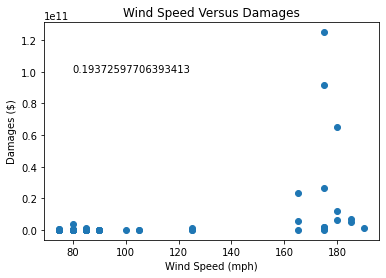

In [23]:
plt.scatter(df4['Wind Speed (mph)'], df4['Damages ($)'])
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Damages ($)')
plt.annotate(r_2, [80, 100000000000])
plt.title('Wind Speed Versus Damages')
plt.show()

In [29]:
df4['Pressure (hPa)'] = df4['Pressure (hPa)'].str.replace(',', '').astype(float)
df4.dtypes

Name                 object
Areas affected       object
Month                object
Day                   int64
Year                  int64
Wind Speed (mph)      int64
Pressure (hPa)      float64
Damages ($)         float64
Deaths                int64
dtype: object

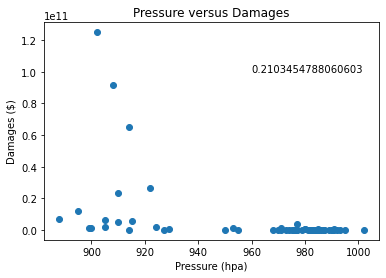

In [31]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df4['Pressure (hPa)'], df4['Damages ($)'])
r_2 = r_value **2
plt.scatter(df4['Pressure (hPa)'], df4['Damages ($)'])
plt.xlabel('Pressure (hpa)')
plt.ylabel('Damages ($)')
plt.title('Pressure versus Damages')
plt.annotate(r_2, [960, 100000000000])
plt.show()

In [34]:
#df5['Pressure (hPa)'] = df5['Pressure (hPa)'].str.replace(',', '').astype(float)
df5.dtypes

Name                 object
Areas affected       object
Month                object
Day                   int64
Year                  int64
Wind Speed (mph)      int64
Pressure (hPa)      float64
Damages ($)         float64
Deaths                int64
dtype: object

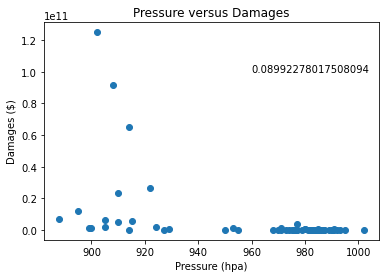

In [35]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df5['Pressure (hPa)'], df5['Deaths'])
r_2 = r_value **2
plt.scatter(df5['Pressure (hPa)'], df5['Damages ($)'])
plt.xlabel('Pressure (hpa)')
plt.ylabel('Damages ($)')
plt.title('Pressure versus Damages')
plt.annotate(r_2, [960, 100000000000])
plt.show()

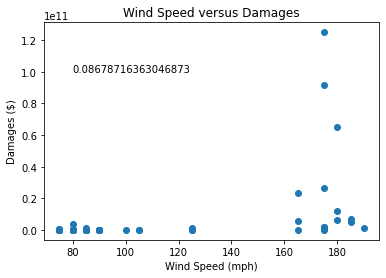

In [38]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df5['Wind Speed (mph)'], df5['Deaths'])
r_2 = r_value **2
plt.scatter(df5['Wind Speed (mph)'], df5['Damages ($)'])
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Damages ($)')
plt.title('Wind Speed versus Damages')
plt.annotate(r_2, [80, 100000000000])
plt.show()

In [39]:
df6 = df5

In [40]:
def conversion(month):
    if month == 'January':
        return 1
    elif month == 'February':
        return 2
    elif month == 'March':
        return 3
    elif month == 'April':
        return 4
    elif month == 'May':
        return 5
    elif month == 'June':
        return 6
    elif month == 'July':
        return 7
    elif month == 'August':
        return 8
    elif month == 'September':
        return 9
    elif month == 'October':
        return 10
    elif month == 'November':
        return 11
    elif month == 'December':
        return 12
df6['Month'] = df6['Month'].apply(lambda x: conversion(x))

In [41]:
df6

,Name,Areas affected,Month,Day,Year,Wind Speed (mph),Pressure (hPa),Damages ($),Deaths
0,Mitch,"Central America, Yucatin Peninsula, South Florida",10,26,1998,180,905.0,6.200000e+09,19325
1,Maria,"Lesser Antilles, Virgin Islands, Puerto Rico, ...",9,18,2017,175,908.0,9.160000e+10,3057
2,David,"The Caribbean, United States East coast",8,30,1979,175,924.0,1.540000e+09,2068
3,Katrina,"Bahamas, United States Gulf Coast",8,28,2005,175,902.0,1.250000e+11,1836
4,Stan,"Costa Rica, Nicaragua, Honduras, El Salvador, ...",10,1,2005,80,977.0,3.960000e+09,1668
...,...,...,...,...,...,...,...,...,...
56,Anna,"Windward Islands, Colombia, Venezuela, Central...",7,20,1961,105,976.0,3.000000e+02,1
57,Dennis,"Lesser Antilles, Greater Antilles, The Bahamas...",8,7,1981,80,995.0,1.500000e+07,0
58,Florence,"Bermuda, Newfoundland, United States East Coas...",9,3,2006,90,974.0,2.000000e+02,0
59,Dean,"Leeward Islands, Bermuda, North Carolina, Newf...",7,31,1989,105,968.0,8.900000e+06,0


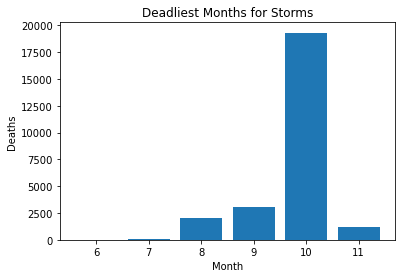

In [45]:
plt.bar(df6['Month'], df6['Deaths'])
plt.xlabel('Month')
plt.ylabel('Deaths')
plt.title('Deadliest Months for Storms')
plt.show()

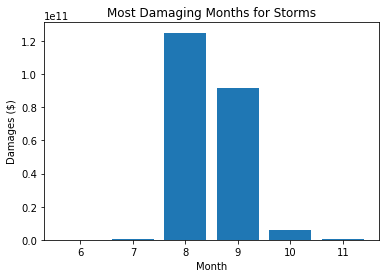

In [60]:
plt.bar(df6['Month'], df6['Damages ($)'])
plt.xlabel('Month')
plt.ylabel('Damages ($)')
plt.title('Most Damaging Months for Storms')
plt.show()

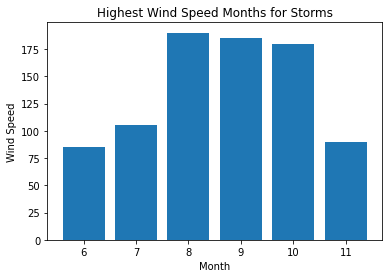

In [61]:
plt.bar(df6['Month'], df6['Wind Speed (mph)'])
plt.xlabel('Month')
plt.ylabel('Wind Speed')
plt.title('Highest Wind Speed Months for Storms')
plt.show()

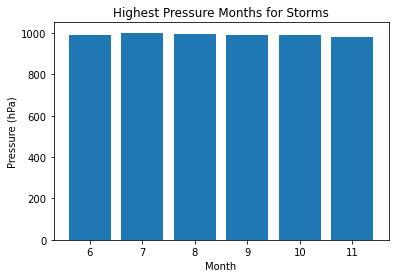

In [62]:
plt.bar(df6['Month'], df6['Pressure (hPa)'])
plt.xlabel('Month')
plt.ylabel('Pressure (hPa)')
plt.title('Highest Pressure Months for Storms')
plt.show()

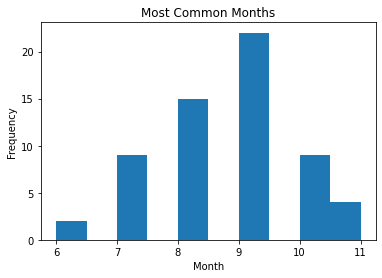

In [47]:
plt.hist(df6['Month'])
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Most Common Months')
plt.show()

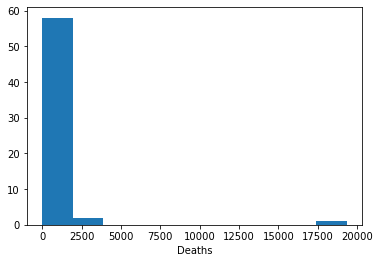

In [55]:
plt.hist(df6['Deaths'])
plt.xlabel('Deaths')
plt.show()

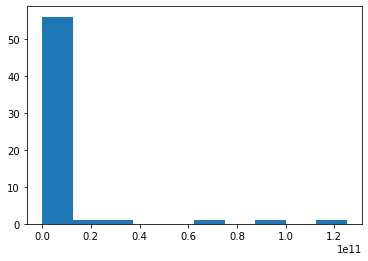

In [56]:
plt.hist(df6['Damages ($)'])
plt.show()

In [64]:
df.to_json('static/js/dfjson.json')

In [66]:
df.head()

,Name,Areas affected,Month,Day,Year,Wind Speed (mph),Pressure (hPa),Damages ($),Deaths,lat,long,category
0,Janet,"Lesser Antilles, Central America",September,27,1955,175,914,6.580000e+07,1023,17.3,-83.0,4.0
1,Inez,"Greater Antilles, Florida, Mexico",September,28,1966,165,927,2.290000e+08,756,16.3,-63.0,3.0
2,Inez,"Greater Antilles, Florida, Mexico",September,28,1966,165,927,2.290000e+08,756,16.5,-64.4,4.0
3,Inez,"Greater Antilles, Florida, Mexico",September,28,1966,165,927,2.290000e+08,756,17.0,-67.2,5.0
4,Camille,"Cuba, United States Gulf Coast",August,16,1969,175,900,1.420000e+09,259,24.3,-86.6,5.0


In [67]:
df2 = df

In [70]:
df2['Year']= df2['Year'].astype('str')

In [72]:
df2['Name_year'] = df2['Name'] + " " + df2['Year']
df2

,Name,Areas affected,Month,Day,Year,Wind Speed (mph),Pressure (hPa),Damages ($),Deaths,lat,long,category,Name_year
0,Janet,"Lesser Antilles, Central America",September,27,1955,175,914,6.580000e+07,1023,17.3,-83.0,4.0,Janet 1955
1,Inez,"Greater Antilles, Florida, Mexico",September,28,1966,165,927,2.290000e+08,756,16.3,-63.0,3.0,Inez 1966
2,Inez,"Greater Antilles, Florida, Mexico",September,28,1966,165,927,2.290000e+08,756,16.5,-64.4,4.0,Inez 1966
3,Inez,"Greater Antilles, Florida, Mexico",September,28,1966,165,927,2.290000e+08,756,17.0,-67.2,5.0,Inez 1966
4,Camille,"Cuba, United States Gulf Coast",August,16,1969,175,900,1.420000e+09,259,24.3,-86.6,5.0,Camille 1969
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Hanna,"Puerto Rico, Turks and Caicos Islands, The Bah...",August,28,2008,85,977,1.600000e+08,537,20.5,-59.6,0.0,Hanna 2008
155,Kyle,"Puerto Rico, Hispaniola, Bermuda, New England,...",September,25,2008,85,984,5.710000e+07,8,21.5,-70.0,-1.0,Kyle 2008
156,Kyle,"Puerto Rico, Hispaniola, Bermuda, New England,...",September,25,2008,85,984,5.710000e+07,8,22.0,-69.4,0.0,Kyle 2008
157,Kyle,"Puerto Rico, Hispaniola, Bermuda, New England,...",September,25,2008,85,984,5.710000e+07,8,22.4,-68.7,0.0,Kyle 2008


In [73]:
df2.to_json('static/js/test.json')

In [4]:
df = pd.read_json('static/js/test.json')

In [5]:
df

,Name,Areas affected,Month,Day,Year,Wind Speed (mph),Pressure (hPa),Damages ($),Deaths,lat,long,category,Name_year
0,Janet,"Lesser Antilles, Central America",September,27,1955,175,914,65800000,1023,17.3,-83.0,4,Janet 1955
1,Inez,"Greater Antilles, Florida, Mexico",September,28,1966,165,927,229000000,756,16.3,-63.0,3,Inez 1966
2,Inez,"Greater Antilles, Florida, Mexico",September,28,1966,165,927,229000000,756,16.5,-64.4,4,Inez 1966
3,Inez,"Greater Antilles, Florida, Mexico",September,28,1966,165,927,229000000,756,17.0,-67.2,5,Inez 1966
4,Camille,"Cuba, United States Gulf Coast",August,16,1969,175,900,1420000000,259,24.3,-86.6,5,Camille 1969
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Hanna,"Puerto Rico, Turks and Caicos Islands, The Bah...",August,28,2008,85,977,160000000,537,20.5,-59.6,0,Hanna 2008
155,Kyle,"Puerto Rico, Hispaniola, Bermuda, New England,...",September,25,2008,85,984,57100000,8,21.5,-70.0,-1,Kyle 2008
156,Kyle,"Puerto Rico, Hispaniola, Bermuda, New England,...",September,25,2008,85,984,57100000,8,22.0,-69.4,0,Kyle 2008
157,Kyle,"Puerto Rico, Hispaniola, Bermuda, New England,...",September,25,2008,85,984,57100000,8,22.4,-68.7,0,Kyle 2008


In [6]:
df2 = pd.read_csv('Data/storms_updated2.csv')

In [12]:
df3 = df2.loc[(df2['name'] == 'Kyle') & (df2['year'] == 2008)]

In [13]:
df3

,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
12966,Kyle,2008,9,25,0,21.5,-70.0,tropical depression,-1,30,1005,0.0,0.0
12967,Kyle,2008,9,25,6,22.0,-69.4,tropical storm,0,35,1003,90.0,0.0
12968,Kyle,2008,9,25,12,22.4,-68.7,tropical storm,0,40,1002,100.0,0.0
12969,Kyle,2008,9,25,18,23.1,-68.4,tropical storm,0,40,1001,100.0,0.0
12970,Kyle,2008,9,26,0,24.0,-68.0,tropical storm,0,45,998,115.0,0.0
12971,Kyle,2008,9,26,6,25.0,-68.2,tropical storm,0,50,996,160.0,0.0
12972,Kyle,2008,9,26,12,26.0,-68.6,tropical storm,0,50,998,200.0,0.0
12973,Kyle,2008,9,26,18,26.9,-68.6,tropical storm,0,50,1000,180.0,0.0
12974,Kyle,2008,9,27,0,28.7,-68.6,tropical storm,0,55,998,180.0,0.0
12975,Kyle,2008,9,27,6,29.9,-69.3,tropical storm,0,60,996,250.0,0.0


In [14]:
df = pd.read_csv('Data/NOAA.csv')

In [15]:
df

AL011851  \
18510625  0000     HU  28.0N   94.8W 80.0 -999.0  -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0    -999.0   
          0600     HU  28.0N   95.4W 80.0 -999.0  -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0    -999.0   
          1200     HU  28.0N   96.0W 80.0 -999.0  -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0    -999.0   
          1800     HU  28.1N   96.5W 80.0 -999.0  -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0    -999.0   
          2100  L  HU  28.2N   96.8W 80.0 -999.0  -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0    -999.0   
...                                                                                                                    ...   
20211107  0000     TS  37.4N   37.4W 35.0  1003.0  0.0    60.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0         0.0   
          0600     TS  38.1N   36.4W 35.0  1004.0  0.0    60.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0         0.0   
          1200     LO  39.2N   34.9W 35.0  1006.0  0.0    90.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0         0.0   
          1800     LO  40.9N   32.8W 40.0  1006.0  0.0    90.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0         0.0   
20211108  0000     LO  43.2N   29.7W 40.0  1006.0  30.0   70.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0         0.0   

                                                                                                                              UNNAMED  \
18510625  0000     HU  28.0N   94.8W 80.0 -999.0  -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0               -999.0   
          0600     HU  28.0N   95.4W 80.0 -999.0  -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0               -999.0   
          1200     HU  28.0N   96.0W 80.0 -999.0  -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0               -999.0   
          1800     HU  28.1N   96.5W 80.0 -999.0  -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0               -999.0   
          2100  L  HU  28.2N   96.8W 80.0 -999.0  -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0               -999.0   
...                                                                                                                               ...   
20211107  0000     TS  37.4N   37.4W 35.0  1003.0  0.0    60.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0                    0.0   
          0600     TS  38.1N   36.4W 35.0  1004.0  0.0    60.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0                    0.0   
          1200     LO  39.2N   34.9W 35.0  1006.0  0.0    90.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0                    0.0   
          1800     LO  40.9N   32.8W 40.0  1006.0  0.0    90.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0                    0.0   
20211108  0000     LO  43.2N   29.7W 40.0  1006.0  30.0   70.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0                    0.0   

                                                                                                                       14  \
18510625  0000     HU  28.0N   94.8W 80.0 -999.0  -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   -999.0   
          0600     HU  28.0N   95.4W 80.0 -999.0  -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   -999.0   
          1200     HU  28.0N   96.0W 80.0 -999.0  -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   -999.0   
          1800     HU  28.1N   96.5W 80.0 -999.0  -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   -999.0   
          2100  L  HU  28.2N   96.8W 80.0 -999.0  -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0 -999.0   -999.0   
...                                                                                                                   ...   
20211107  0000     TS  37.4N   37.4W 35.0  1003.0  0.0    60.0   0.0    0.0    0.

In [16]:
df2

,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
0,AL011852,1852,8,26,6,30.2,-88.6,hurricane,3,100,961,NaN,NaN
1,AL031853,1853,9,3,12,19.7,-56.2,hurricane,4,130,924,NaN,NaN
2,AL031854,1854,9,7,12,28.0,-78.6,hurricane,3,110,938,NaN,NaN
3,AL031854,1854,9,8,18,31.6,-81.1,hurricane,3,100,950,NaN,NaN
4,AL031854,1854,9,8,20,31.7,-81.1,hurricane,3,100,950,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17781,Wanda,2021,11,6,6,37.6,-38.3,tropical storm,0,45,1000,110.0,0.0
17782,Wanda,2021,11,6,12,37.2,-38.4,tropical storm,0,40,1001,100.0,0.0
17783,Wanda,2021,11,6,18,37.1,-38.0,tropical storm,0,35,1002,100.0,0.0
17784,Wanda,2021,11,7,0,37.4,-37.4,tropical storm,0,35,1003,60.0,0.0


In [22]:
df2 = df2[['name', 'year', 'category']]

In [23]:
df2

,name,year,category
0,AL011852,1852,3
1,AL031853,1853,4
2,AL031854,1854,3
3,AL031854,1854,3
5,AL041855,1855,0
...,...,...,...
17768,Wanda,2021,0
17772,Wanda,2021,0
17776,Wanda,2021,0
17780,Wanda,2021,0


In [24]:
df2 = df2.drop_duplicates()

In [25]:
df2.reset_index(drop=True)

,name,year,category
0,AL011852,1852,3
1,AL031853,1853,4
2,AL031854,1854,3
3,AL041855,1855,0
4,AL011856,1856,4
...,...,...,...
2868,Sam,2021,3
2869,Sam,2021,4
2870,Victor,2021,-1
2871,Victor,2021,0


In [30]:
df2['year']= df2['year'].astype('str')
df2['Name_year'] = df2['name'] + " " + df2['year']

C:\Users\rcrch\AppData\Local\Temp\ipykernel_25880\4058404875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['year']= df2['year'].astype('str')
C:\Users\rcrch\AppData\Local\Temp\ipykernel_25880\4058404875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Name_year'] = df2['name'] + " " + df2['year']


In [31]:
df2

,name,year,category,Name_year
0,AL011852,1852,3,AL011852 1852
1,AL031853,1853,4,AL031853 1853
2,AL031854,1854,3,AL031854 1854
5,AL041855,1855,0,AL041855 1855
6,AL011856,1856,4,AL011856 1856
...,...,...,...,...
17703,Sam,2021,3,Sam 2021
17704,Sam,2021,4,Sam 2021
17742,Victor,2021,-1,Victor 2021
17743,Victor,2021,0,Victor 2021


In [33]:
values = df2['Name_year'].unique()

In [34]:
df2.reset_index(drop=True)

,name,year,category,Name_year
0,AL011852,1852,3,AL011852 1852
1,AL031853,1853,4,AL031853 1853
2,AL031854,1854,3,AL031854 1854
3,AL041855,1855,0,AL041855 1855
4,AL011856,1856,4,AL011856 1856
...,...,...,...,...
2868,Sam,2021,3,Sam 2021
2869,Sam,2021,4,Sam 2021
2870,Victor,2021,-1,Victor 2021
2871,Victor,2021,0,Victor 2021


In [36]:
len(values)

1146

In [37]:
for val in values:
    new_df = df2.loc[df2['Name_year'] == val]
    big = new_df['category'].max()
    df2.loc[df2['Name_year'] == val, 'category'] = big

In [38]:
df2

,name,year,category,Name_year
0,AL011852,1852,3,AL011852 1852
1,AL031853,1853,4,AL031853 1853
2,AL031854,1854,3,AL031854 1854
5,AL041855,1855,0,AL041855 1855
6,AL011856,1856,4,AL011856 1856
...,...,...,...,...
17703,Sam,2021,4,Sam 2021
17704,Sam,2021,4,Sam 2021
17742,Victor,2021,0,Victor 2021
17743,Victor,2021,0,Victor 2021


In [39]:
df3 = df2.dropna()

In [42]:
df3 = df2.drop_duplicates().reset_index(drop=True)

In [44]:
df3 = df3.rename(columns={'name': 'Name', 'month': 'Month', 'year':'Year', 'category': 'Category'})

In [45]:
df3

,Name,Year,Category,Name_year
0,AL011852,1852,3,AL011852 1852
1,AL031853,1853,4,AL031853 1853
2,AL031854,1854,3,AL031854 1854
3,AL041855,1855,0,AL041855 1855
4,AL011856,1856,4,AL011856 1856
...,...,...,...,...
1141,Peter,2021,0,Peter 2021
1142,Rose,2021,0,Rose 2021
1143,Sam,2021,4,Sam 2021
1144,Victor,2021,0,Victor 2021


In [46]:
df3.to_json('static/js/category.json')